**Assignment 02**

Implementasikan histogram of energy, histogram of zero crossing rate, histogram of energy entropy tanpa menggunakan library. Yang perlu anda submit adalah link google colab.

In [94]:
import matplotlib.pyplot as plt
import librosa.display
import librosa
import math
import numpy as np
import IPython.display as ipd
from numpy.lib.stride_tricks import sliding_window_view
from google.colab import drive
drive.mount('/content/drive')

DataAudio = '/content/drive/MyDrive/BabyElephantWalk60.wav'
x,sr = librosa.load(DataAudio,sr=16000)
ipd.Audio(DataAudio)

Output hidden; open in https://colab.research.google.com to view.

Visualisasi Audio

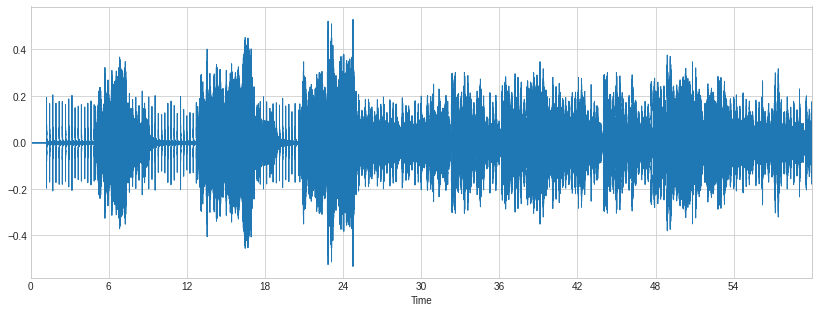

In [95]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(x, sr=sr)

In [98]:
ukuran = 16000
ukuran2 = ukuran/2
win = sliding_window_view(x,ukuran)[::int(ukuran2)]
CWindows, countdata = win.shape
print(CWindows)
energy = np.zeros(shape = (CWindows))

119


In [99]:
i=0
while i<CWindows:
  j=0
  while j<ukuran:
    energy[i]+= win[i][j]**2
    j+=1
  energy[i]=energy[i]/ukuran
  i+=1
print(energy)

[0.00000000e+00 5.17370870e-05 9.81360401e-05 9.57776549e-05
 1.00768237e-04 1.04808512e-04 9.40649646e-05 7.91716839e-05
 2.43772563e-04 2.00287124e-03 4.39805333e-03 5.56915228e-03
 8.87673883e-03 1.00845399e-02 4.92273278e-03 1.07703102e-03
 1.05795702e-03 8.07127374e-04 1.28750414e-04 8.01819228e-05
 8.88908787e-05 1.07123620e-04 7.96281963e-05 6.02602547e-05
 4.18161560e-04 3.39397280e-03 6.02927498e-03 7.05805857e-03
 6.74121844e-03 6.51419863e-03 8.91195653e-03 1.35934902e-02
 1.71622104e-02 1.01058162e-02 1.97225125e-03 9.55174713e-04
 7.52255782e-04 3.94005325e-04 9.82346646e-05 7.82912264e-05
 1.98787262e-03 4.21888229e-03 5.11446699e-03 6.15040455e-03
 8.04650854e-03 1.17105070e-02 1.08889920e-02 7.80516226e-03
 8.61895541e-03 5.73546061e-03 2.04707553e-03 1.78808611e-03
 1.58541488e-03 1.62100892e-03 1.80741404e-03 1.65881189e-03
 1.65483510e-03 1.81794505e-03 1.82190495e-03 1.96560082e-03
 2.08516075e-03 2.14075795e-03 2.10968267e-03 4.61624573e-03
 6.28041323e-03 4.803913

<function matplotlib.pyplot.show>

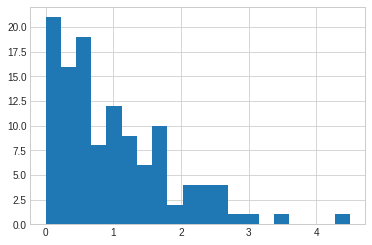

In [100]:
EnMean = np.mean(energy)
EnNormalisasi = energy/EnMean
plt.hist(EnNormalisasi,bins=20)
plt.show

In [101]:
ZeroCR=np.zeros(shape=(CWindows))
i=0
while i<CWindows:
  j=1
  while j<ukuran:
    ZeroCR[i]+= abs(np.sign(win[i][j])-np.sign(win[i][j-1]))
    j+=1
  ZeroCR[i]=ZeroCR[i]/(2*ukuran)
  i+=1

print(ZeroCR)

[0.         0.08734375 0.19878125 0.2125625  0.2045     0.2121875
 0.214      0.201      0.16775    0.1275625  0.105375   0.105125
 0.1105625  0.125375   0.15275    0.1935625  0.1929375  0.1765
 0.2056875  0.215625   0.2145625  0.208375   0.20775    0.1984375
 0.1611875  0.123375   0.1064375  0.1159375  0.114625   0.1076875
 0.1059375  0.1125     0.135625   0.1553125  0.1603125  0.1708125
 0.162      0.168625   0.2129375  0.226875   0.1765     0.1221875
 0.11525    0.11775    0.1106875  0.112875   0.1179375  0.1183125
 0.114625   0.0909375  0.061      0.0535625  0.05175    0.0500625
 0.0453125  0.04475    0.05375    0.050875   0.0493125  0.047
 0.059875   0.0715     0.0596875  0.072625   0.12325    0.20575
 0.2473125  0.211875   0.174375   0.1186875  0.07475    0.0923125
 0.1418125  0.235875   0.255875   0.213375   0.2200625  0.2213125
 0.2104375  0.1779375  0.1544375  0.150875   0.1424375  0.1500625
 0.1236875  0.07575    0.06325    0.109375   0.1715     0.232875
 0.236875   0.1928125

<function matplotlib.pyplot.show>

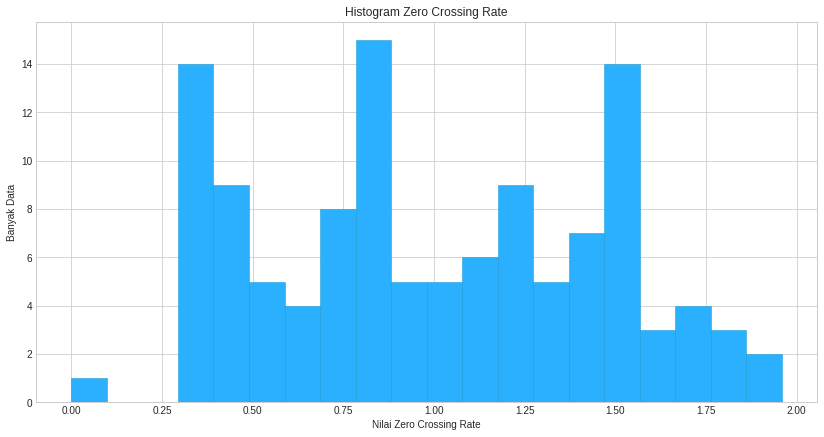

In [103]:
meanZCR = np.mean(ZeroCR)
zeroCrossRateNormalisasi = ZeroCR/meanZCR

plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(zeroCrossRateNormalisasi, bins=20, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Histogram Zero Crossing Rate') 
plt.xlabel('Nilai Zero Crossing Rate') 
plt.ylabel('Banyak Data')
plt.show

In [106]:
banyakSubWindow = 8  
banyakDataSubWindow = ukuran/banyakSubWindow
subwin = win.reshape(119, banyakSubWindow, int(banyakDataSubWindow))
subwin.shape

(119, 8, 2000)

In [108]:
energySub=np.zeros(shape=(CWindows,banyakSubWindow))
energyWin=np.zeros(shape=(CWindows))
i=j=l=0
while i<CWindows:
  j=0
  while j<banyakSubWindow:
    l=0
    while l<banyakDataSubWindow:
      energySub[i][j]+=subwin[i][j][l]**2
      l+=1
    energySub[i][j]=energySub[i][j]/banyakDataSubWindow
    energyWin[i]+=energySub[i][j]
    j+=1
  i+=1
rasioSubWindow=np.zeros(shape=(CWindows,banyakSubWindow))
i=j=0
while i<CWindows:
  j=0
  while j<banyakSubWindow:
    rasioSubWindow[i][j]=energySub[i][j]/energyWin[i]
    j+=1
  i+=1
entropi = np.zeros(shape=(CWindows))
i=j=0
while i<CWindows:
  j=0
  while j<banyakSubWindow:
    if (rasioSubWindow[i][j]) :
      temp = rasioSubWindow[i][j]
      entropi[i] += temp*math.log2(temp)
    j+=1
  entropi[i]=entropi[i]*-1
  i+=1
print(entropi)

[       nan 1.04648191 2.11186458 2.18777791 2.17109935 2.14741679
 2.42528221 2.78293832 1.68845255 2.07333851 2.76075324 2.86253283
 2.87123944 2.87700574 2.40656575 2.85199715 2.84553028 2.37836869
 2.50105786 2.27641012 2.33407444 2.56021561 2.59946308 2.44104527
 1.63023403 2.28989327 2.88495103 2.93947556 2.93194575 2.90763468
 2.93100451 2.81939526 2.87317027 2.51374489 2.69796501 2.88164017
 2.78930795 2.26318042 2.40115351 2.25823394 1.41482995 2.60523643
 2.89747603 2.93106695 2.76189538 2.71673467 2.79790277 2.97819831
 2.85034193 2.44287085 2.79300091 2.77912749 2.94178472 2.88507726
 2.81559761 2.67258541 2.68744325 2.90208949 2.96856239 2.91082544
 2.8496837  2.86802955 2.93120764 2.33710965 2.54351273 2.73936676
 2.79457792 2.8184619  2.70769573 2.66489827 2.85776345 2.19313283
 2.60989604 2.83837385 2.80618596 2.64653465 2.92077717 2.98317744
 2.83867579 2.87096179 2.89950211 2.936234   2.85442268 2.77082859
 2.71692034 2.89509328 2.78126896 2.4183903  2.65655057 2.8739

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars


<function matplotlib.pyplot.show>

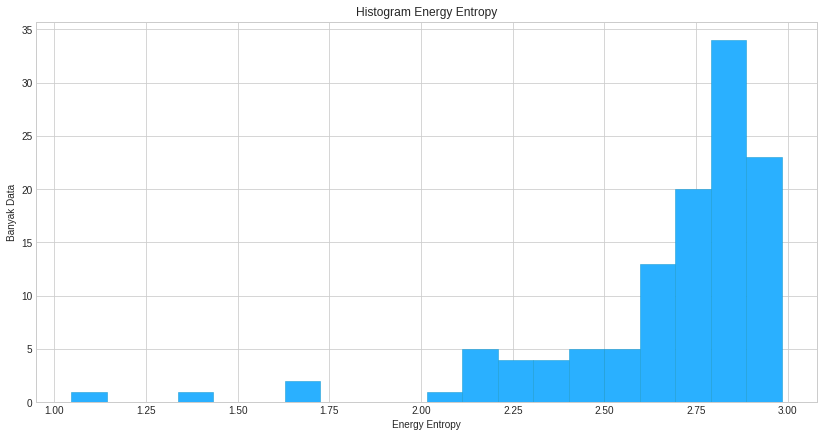

In [110]:
plt.figure(figsize=(14,7))
plt.style.use('seaborn-whitegrid')
plt.hist(entropi, bins=20, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.title('Histogram Energy Entropy') 
plt.xlabel('Energy Entropy') 
plt.ylabel('Banyak Data')
plt.show